# Project 1 Task Description：
- Intelligence Solutions Sdn. Bhd. is a company that provides an intelligence system solution to worldwide customers. The company recently awarded a contract to help a Portuguese banking institution with its direct marketing campaigns. The goal is to predict if the client will subscribe or not to the promoted term deposit product.

The bank has provided the data at the following website: 
- Bank Marketing dataset at UC Irvine Machine Learning Repository (https://archive.ics.uci.edu/dataset/222/bank+marketing)
- **Note: Use bank-additional.csv dataset

### Task：
- To identify the suitable AI solution for this prediction problem.
- Identify optimized parameters for the solution.
- To implement the solution using any tools or languages
- To analyze the results.
- Suggestion to further improve the results and implement proposed improvement.



### Submission:
Report:
- Introduction to the proposed solution and justification of selection.
- The proposed solution architecture and justification.
- The proposed optimized parameters and justification.
- Steps of implementation with complete screenshots
- Implementation of proposed improvement/enhancement with complete screenshots
- Result analysis and discussion.
- Complete working source code or implementation files.

___
# NAME: Connie Tang Ming Xin
# MATRIC NUMBER: MEC245051

___
# Student outcomes:
___

# Project 1
1. Dataset: dataset\bank-additional.csv 
    - Sourse downloaded from UC Irvine Machine Learning Repository: https://archive.ics.uci.edu/dataset/222/bank+marketing
    - Description: 
        - The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. 
        - The classification goal is to predict if the client will subscribe a term deposit (variable y).

2. Model:
    - Logistic Regression
    - XGBoost

3. Hyperparameter Tuning for XGBoost 
    - Manual fine tune by best score and best parameters
    - Manual fine tune by Grid Search

4. Model Evaluation
    - Confusion Matrix
    - ROC AUC

5. Platform: offline AI tools & code your own solution
    - Visual Studio Code
    - Jupyter Notebook
    - Python
    - pandas, matplotlib, seaborn, scikit-learn, xgboost

GitHub: https://github.com/CTMX-Zhen/Project_1_bank_additional_CTMX

___
# Required Packages (if needed)
___

In [1]:
!pip install pandas matplotlib seaborn scikit-learn

  Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.2-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.2.1-cp312-cp312-win_amd64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached scipy-1.15.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ------------------- -------------------- 5.2/11.0 MB 26.5 MB/s eta 0:00:01
   ------------------

In [ ]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
    --------------------------------------- 2.1/150.0 MB 10.7 MB/s eta 0:00:14
   - -------------------------------------- 4.2/150.0 MB 11.5 MB/s eta 0:00:13
   - -------------------------------------- 7.1/150.0 MB 12.1 MB/s eta 0:00:12
   -- ------------------------------------- 9.4/150.0 MB 11.3 MB/s eta 0:00:13
   --- ------------------------------------ 12.3/150.0 MB 11.9 MB/s eta 0:00:12
   --- ------------------------------------ 13.9/150.0 MB 11.0 MB/s eta 0:00:13
   ---- ----------------------------------- 15.5/150.0 MB 10.4 MB/s eta 0:00:13
   ---- ----------------------------------- 17.6/150.0 MB 10.4 MB/s eta 0:00:13
   ----- ---------------------------------- 20.2/150.0 MB 10.6 MB/s eta 0:00:13
   ----- ---------------------------------- 22.0/150.0 MB 10.4 MB/s eta 0:00:13
   ------ --------------------------------- 23.6/150.0 MB 10.2 MB/s eta 0:00:13
   ------ --------------------------------- 26.0/150.

___
# Import all needed packages
___

In [ ]:
import os
import sys
import joblib
import logging
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from itertools import product
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

___
# == HELPER FUNCTIONS ==

# 1. Setup logger

In [ ]:
def setup_logger(log_file="train_log.txt"):
    """
    Sets up a logger with two handlers: a file handler and a console handler.
    
    Args:
        log_file (str, optional): The file to write logs to. Defaults to "train_log.txt".
    
    Returns:
        logging.Logger: The logger object.
    """
    logger = logging.getLogger()
    logger.setLevel(logging.INFO)
    
    # Formatter
    # The formatter is used to format the log messages.
    # It takes the log message as input and returns a string.
    formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
    
    # File handler
    # The file handler is used to write logs to a file.
    # It takes the log file path as an argument.
    fh = logging.FileHandler(log_file)
    fh.setLevel(logging.INFO)
    fh.setFormatter(formatter)
    logger.addHandler(fh)
    
    # Console handler
    # The console handler is used to write logs to the console.
    # It takes the output stream as an argument.
    ch = logging.StreamHandler(sys.stdout)
    ch.setLevel(logging.INFO)
    ch.setFormatter(formatter)
    logger.addHandler(ch)
    
    return logger

# 2. Load the dataset

In [5]:
def load_dataset(file_path):
    """
    Loads the dataset from a CSV file.
    
    Args:
        file_path (str): The path to the CSV file.
    
    Returns:
        pandas.DataFrame: The loaded dataset.
    """
    return pd.read_csv(file_path, sep=';')

# 3. Quick overview of the dataset

In [6]:
def quick_overview(data):
    """
    logger.infos the first 5 rows of the dataset, its shape and some statistics of the categorical and numerical columns.

    Args:
        data (pandas.DataFrame): The dataset to be logger.infoed.
    """
    # The first 5 rows of the dataset
    logger.info("First 5 rows of the dataset:")
    logger.info("\n" + str(data.head()))

    # The shape of the dataset
    logger.info(data.shape)

    # Count the number of missing values in the dataset
    logger.info("Number of missing values in each column:")
    logger.info("\n" + str(data.isnull().sum()))

    # Get the categorical columns
    categorical_cols = data.select_dtypes(include='object').columns

    # logger.info the categorical columns
    logger.info("Categorical columns:\n" + "\n".join(f"- {col}" for col in categorical_cols))

    return categorical_cols

# 4. Data preprocessing

In [7]:
def data_preprocessing(data, categorical_cols):
    """
    Preprocesses the dataset by converting the target variable to binary
    and one-hot encoding the categorical variables (excluding the target).

    Args:
        data (pandas.DataFrame): The dataset to be preprocessed.

    Returns:
        pandas.DataFrame: The preprocessed dataset.
    """
    # Convert target variable to binary
    # Map the target variable to 0/1
    data['y'] = data['y'].map({'yes': 1, 'no': 0})

    # One-hot encode categorical variables (excluding target)
    # One-hot encode the categorical variables
    data_encoded = pd.get_dummies(data, columns=[col for col in categorical_cols if col != 'y'], drop_first=True)

    return data_encoded

# 5. Split Dataset

In [8]:
def split_dataset(data_encoded, test_size=0.2):
    """
    Splits the dataset into training and testing sets.

    Args:
        data (pandas.DataFrame): The dataset to be split.
        test_size (float, optional): The proportion of the dataset to include in the test set. Defaults to 0.2.

    Returns:
        tuple: A tuple containing the training and testing datasets.
    """

    # Split the dataset into training and testing sets.
    # The target variable is the last column in the dataset.
    X = data_encoded.drop('y', axis=1)
    y = data_encoded['y']

    # Split the dataset into training and testing sets using stratified sampling.
    # This ensures that the proportion of positive and negative samples in the training and testing sets is the same as in the original dataset.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    return X_train, X_test, y_train, y_test

# 6. Baseline Model – Logistic Regression

In [9]:
def baseline_model(X_train, y_train, X_test, y_test):
    """
    Trains a logistic regression model on the training dataset and evaluates its performance on the testing dataset.

    Args:
        X_train (pandas.DataFrame): The training dataset.
        y_train (pandas.Series): The target variable for the training dataset.
        X_test (pandas.DataFrame): The testing dataset.
        y_test (pandas.Series): The target variable for the testing dataset.
    """
    # Feature scaling: Standardize features by removing the mean and scaling to unit variance.
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train logistic regression model.
    lr_model = LogisticRegression(max_iter=1000)
    lr_model.fit(X_train_scaled, y_train)

    # Predict class labels and probabilities.
    y_pred_lr = lr_model.predict(X_test_scaled)
    y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

    # Evaluate the model's performance.
    logger.info("Logistic Regression Performance:")
    logger.info("\n" + classification_report(y_test, y_pred_lr))
    logger.info(f"ROC AUC: {roc_auc_score(y_test, y_prob_lr):.4f}\n")

    # Plot the confusion matrix and ROC curve.
    plot_model(y_test, y_pred_lr, y_prob_lr, "Logistic Regression")

    # Save the model.
    joblib.dump(lr_model, 'model\\Logistic Regression\\lr_model.joblib')

# 7. Improved Model – XGBoost

In [10]:
def improved_model(X_train, y_train, X_test, y_test):
    """
    Trains an XGBoost model on the training dataset and evaluates its performance on the testing dataset.

    Args:
        X_train (pandas.DataFrame): The training dataset.
        y_train (pandas.Series): The target variable for the training dataset.
        X_test (pandas.DataFrame): The testing dataset.
        y_test (pandas.Series): The target variable for the testing dataset.
    """
    # Train XGBoost model.
    xgb_model = XGBClassifier(eval_metric='logloss')
    xgb_model.fit(X_train, y_train)

    # Predict class labels and probabilities.
    y_pred_xgb = xgb_model.predict(X_test)
    y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

    # Evaluate the model's performance.
    logger.info("XGBoost Performance:")
    logger.info("\n" + classification_report(y_test, y_pred_xgb))
    logger.info(f"ROC AUC: {roc_auc_score(y_test, y_prob_xgb):.4f}\n")

    # Plot the confusion matrix and ROC curve.
    plot_model(y_test, y_pred_xgb, y_prob_xgb, "XGBoost")

    # Save the model.
    joblib.dump(xgb_model, 'model\\XGBoost\\xgb_model.joblib')

# 8. Hyperparameter Tuning for XGBoost by best score and best parameters

In [11]:
def bset_score_performance_model(X_train, y_train, X_test, y_test):
    """
    Trains an XGBoost model on the training dataset and evaluates its performance on the testing dataset.
    The function performs a manual hyperparameter tuning for the XGBoost model by iterating over all
    combinations of the given hyperparameters and evaluating the model's ROC AUC score on the testing dataset.

    Args:
        X_train (pandas.DataFrame): The training dataset.
        y_train (pandas.Series): The target variable for the training dataset.
        X_test (pandas.DataFrame): The testing dataset.
        y_test (pandas.Series): The target variable for the testing dataset.
    """
    logger.info("Starting manual fine tune by best score and best parameters...")
    
    # Define the hyperparameters to be tuned
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1],
        'subsample': [0.8, 1]
    }

    # Generate all combinations manually
    param_combos = list(product(*param_grid.values()))
    param_names = list(param_grid.keys())

    # Initialize best score and best parameters
    best_score = 0
    best_params = None

    # Iterate over all combinations
    for combo in param_combos:
        params = dict(zip(param_names, combo))
        model = XGBClassifier(eval_metric='logloss', **params)
        model.fit(X_train, y_train)
        y_prob = model.predict_proba(X_test)[:, 1]
        score = roc_auc_score(y_test, y_prob)
        if score > best_score:
            best_score = score
            best_params = params

    # Log the best score and best parameters
    logger.info(f"Best ROC AUC: {best_score:.4f} with params: {best_params}\n")

    # Train an XGBoost model with the best hyperparameters
    best_score_params_model = XGBClassifier(eval_metric='logloss', **best_params)
    best_score_params_model.fit(X_train, y_train)

    # Predict class labels and probabilities
    y_pred_best_spm = best_score_params_model.predict(X_test)
    y_prob_best_spm = best_score_params_model.predict_proba(X_test)[:, 1]

    # Evaluate the model's performance
    logger.info("Manually Tuned XGBoost Performance:")
    logger.info("\n" + classification_report(y_test, y_pred_best_spm))
    logger.info(f"ROC AUC (Manual Best): {roc_auc_score(y_test, y_prob_best_spm):.4f}\n")

    # Plot the confusion matrix and ROC curve.
    plot_model(y_test, y_pred_best_spm, y_prob_best_spm, "best_score_params_model")

    # Save the model
    joblib.dump(best_score_params_model, 'model\\best_score_params_model\\best_score_params_model.joblib')

# 9. Hyperparameter Tuning for XGBoost by Grid Search

In [12]:
def grid_search_model(X_train, y_train, X_test, y_test):
    """
    Trains an XGBoost model on the training dataset and evaluates its performance on the testing dataset.
    The function uses a grid search to find the best hyperparameters for the XGBoost model.

    Args:
        X_train (pandas.DataFrame): The training dataset.
        y_train (pandas.Series): The target variable for the training dataset.
        X_test (pandas.DataFrame): The testing dataset.
        y_test (pandas.Series): The target variable for the testing dataset.

    Returns:
        None
    """
    logger.info("Starting manual fine tune by Grid Search...")
    # Define the hyperparameters to be tuned.
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1],
        'subsample': [0.8, 1]
    }

    # Perform a grid search to find the best hyperparameters.
    grid_search = GridSearchCV(
        estimator=XGBClassifier(eval_metric='logloss'),
        param_grid=param_grid,
        scoring='roc_auc',
        cv=3,
        verbose=1
    )
    grid_search.fit(X_train, y_train)

    # Log the best parameters found.
    logger.info(f"Best parameters found: {grid_search.best_params_}")

    # Train an XGBoost model with the best hyperparameters and evaluate its performance.
    best_grid_serach_model = grid_search.best_estimator_
    y_pred_best_grid = best_grid_serach_model.predict(X_test)
    y_prob_best_grid = best_grid_serach_model.predict_proba(X_test)[:, 1]

    logger.info("Tuned XGBoost Performance:")
    logger.info("\n" + classification_report(y_test, y_pred_best_grid))
    logger.info(f"ROC AUC: {roc_auc_score(y_test, y_prob_best_grid):.4f}\n")

    # Plot the confusion matrix and ROC curve.
    plot_model(y_test, y_pred_best_grid, y_prob_best_grid, "grid_search")

    # Save the model.
    joblib.dump(best_grid_serach_model, 'model\\grid_search\\grid_search_model.joblib')

# 10. Plotting Confusion Matrix and ROC Curve

In [13]:
def plot_model(y_test, y_pred, y_prob, model):
    """
    Plot the confusion matrix and ROC curve for the given model.
    
    Parameters:
    - y_test: array-like, true labels of the test data.
    - y_pred: array-like, predicted labels by the model.
    - y_prob: array-like, predicted probabilities by the model for the positive class.
    - model: str, name of the model used for plotting and saving files.
    """
    # Ensure model-specific output directory exists
    dir_path = os.path.join("model", model)
    os.makedirs(dir_path, exist_ok=True)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.savefig(os.path.join(dir_path, f"confusion_matrix_{model}.png"))
    plt.show()

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{model} (AUC = {roc_auc_score(y_test, y_prob):.2f})")
    plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line for random guessing
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.savefig(os.path.join(dir_path, f"roc_curve_{model}.png"))
    plt.show()

# 11. Save model each of the model

In [14]:
def save_model(model, model_name):
    """
    Save the given model to a file with the given name.

    The model is saved using joblib.dump, and the file name is the given name
    with ".joblib" appended.

    Args:
        model (object): The model to be saved.
        model_name (str): The name of the file to which the model should be saved.
    """
    # Save the model using joblib.dump
    joblib.dump(model, f"{model_name}.joblib")
    # Log a message indicating that the model has been saved
    logger.info(f"Model saved as {model_name}.joblib")

# 12. Save summary

In [15]:
def save_summary(X_test, y_test):
    """
    Saves a summary of the final model's performance to a file.

    The summary includes the ROC AUC score and the classification report
    for both the manual and grid search models.

    Args:
        X_test (pandas.DataFrame): The test dataset.
        y_test (pandas.Series): The target variable for the test dataset.
    """
    try:
        # Load both models
        manual_model = joblib.load("model\\best_score_params_model\\best_score_params_model.joblib")
        grid_model = joblib.load("model\\grid_search\\grid_search_model.joblib")

        # Predict and evaluate Manual Model
        y_pred_manual = manual_model.predict(X_test)
        y_prob_manual = manual_model.predict_proba(X_test)[:, 1]
        auc_manual = roc_auc_score(y_test, y_prob_manual)
        report_manual = classification_report(y_test, y_pred_manual)

        # Predict and evaluate Grid Model
        y_pred_grid = grid_model.predict(X_test)
        y_prob_grid = grid_model.predict_proba(X_test)[:, 1]
        auc_grid = roc_auc_score(y_test, y_prob_grid)
        report_grid = classification_report(y_test, y_pred_grid)

        # Save summary to file
        with open("final_model_summary.txt", "w") as f:
            f.write("[Manual Tuning Model]\n")
            f.write(f"ROC AUC: {auc_manual:.4f}\n")
            f.write("Classification Report:\n")
            f.write(report_manual + "\n")

            f.write("\n[Grid SearchCV Model]\n")
            f.write(f"ROC AUC: {auc_grid:.4f}\n")
            f.write("Classification Report:\n")
            f.write(report_grid)

        logger.info("Final model summary saved to final_model_summary.txt")

    except FileNotFoundError as e:
        logger.error(f"Could not find model file: {e.filename}")

___
# == START ==

In [16]:
# Step 1: Setup logger
logger = setup_logger("training_log.txt")
logger.info("Starting progress with log logged...")

2025-06-24 00:28:24,453 - INFO - Starting progress with log logged...


In [17]:
# Step 2: Load the dataset
data = load_dataset("dataset\\bank-additional.csv")

In [18]:
# Step 3: Quick overview of the dataset
categorical_cols = quick_overview(data)

2025-06-24 00:28:26,717 - INFO - First 5 rows of the dataset:
2025-06-24 00:28:26,732 - INFO - 
   age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   may         fri  ...         2    999         0  nonexistent   
1  telephone   may         fri  ...         4    999         0  nonexistent   
2  telephone   jun         wed  ...         1    999         0  nonexistent   
3  telephone   jun         fri  ...         3    999         0  nonexistent   
4   cellular   nov         mon  ...         1 

In [19]:
# Step 4: Data preprocessing
data_encoded = data_preprocessing(data, categorical_cols)

In [20]:
# Step 5: Split Dataset
X_train, X_test, y_train, y_test = split_dataset(data_encoded)

2025-06-24 00:28:30,026 - INFO - Logistic Regression Performance:
2025-06-24 00:28:30,034 - INFO - 
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       734
           1       0.75      0.43      0.55        90

    accuracy                           0.92       824
   macro avg       0.84      0.71      0.75       824
weighted avg       0.91      0.92      0.91       824

2025-06-24 00:28:30,036 - INFO - ROC AUC: 0.9319



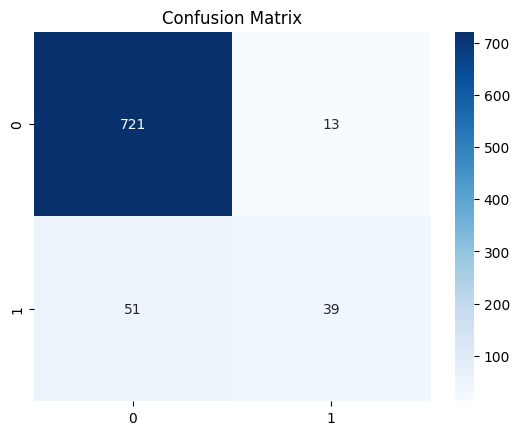

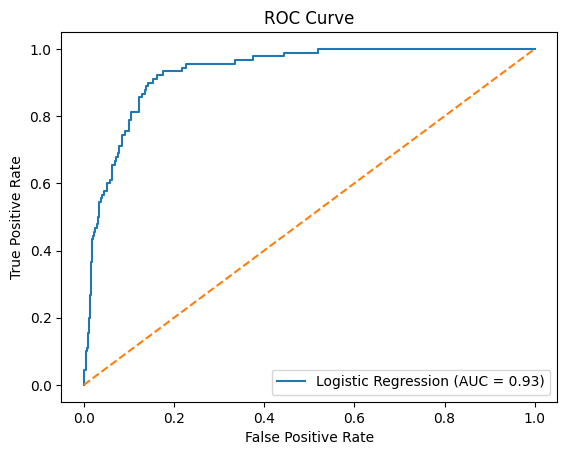

In [21]:
# Step 5: Baseline Model – Logistic Regression
model1 = baseline_model(X_train, y_train, X_test, y_test)

2025-06-24 00:28:31,672 - INFO - XGBoost Performance:
2025-06-24 00:28:31,677 - INFO - 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       734
           1       0.61      0.51      0.55        90

    accuracy                           0.91       824
   macro avg       0.77      0.74      0.75       824
weighted avg       0.90      0.91      0.91       824

2025-06-24 00:28:31,680 - INFO - ROC AUC: 0.9271



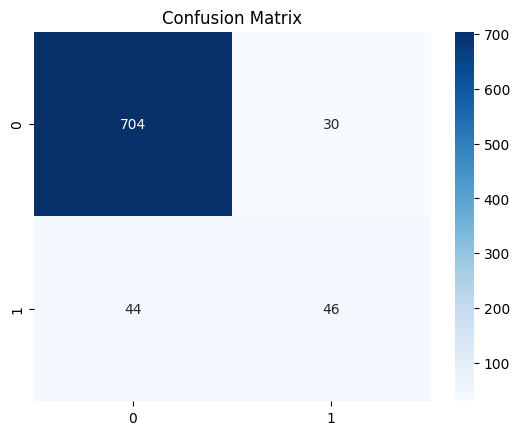

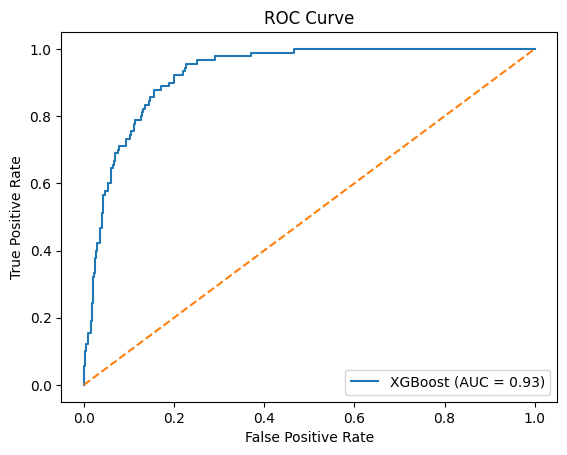

In [22]:
# Step 6: Improved Model – XGBoost
model2 = improved_model(X_train, y_train, X_test, y_test)

2025-06-24 00:28:32,961 - INFO - Starting manual fine tune by best score and best parameters...
2025-06-24 00:28:35,403 - INFO - Best ROC AUC: 0.9438 with params: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'subsample': 0.8}

2025-06-24 00:28:35,461 - INFO - Manually Tuned XGBoost Performance:
2025-06-24 00:28:35,467 - INFO - 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       734
           1       0.60      0.46      0.52        90

    accuracy                           0.91       824
   macro avg       0.77      0.71      0.73       824
weighted avg       0.90      0.91      0.90       824

2025-06-24 00:28:35,470 - INFO - ROC AUC (Manual Best): 0.9438



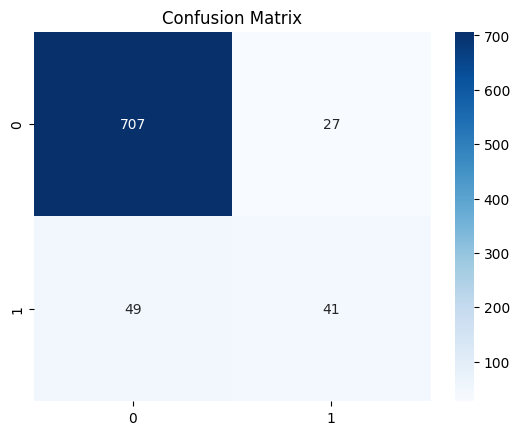

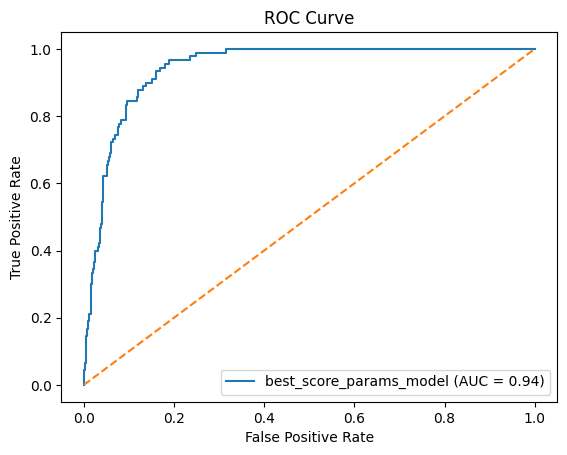

In [23]:
# Step 7: Hyperparameter Tuning for XGBoost
model3_hyperparameter_tuning = bset_score_performance_model(X_train, y_train, X_test, y_test)

2025-06-24 00:28:37,199 - INFO - Starting manual fine tune by Grid Search...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
2025-06-24 00:28:44,604 - INFO - Best parameters found: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
2025-06-24 00:28:44,615 - INFO - Tuned XGBoost Performance:
2025-06-24 00:28:44,622 - INFO - 
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       734
           1       0.68      0.40      0.50        90

    accuracy                           0.91       824
   macro avg       0.80      0.69      0.73       824
weighted avg       0.90      0.91      0.90       824

2025-06-24 00:28:44,624 - INFO - ROC AUC: 0.9432



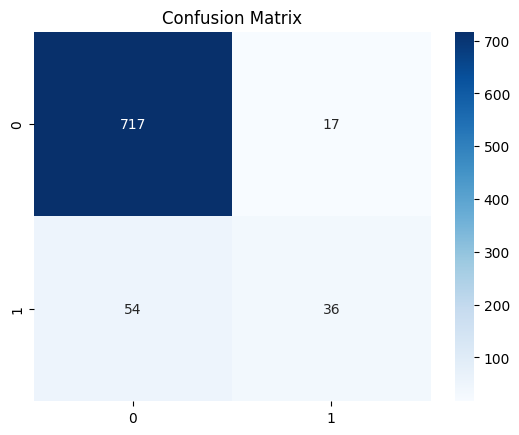

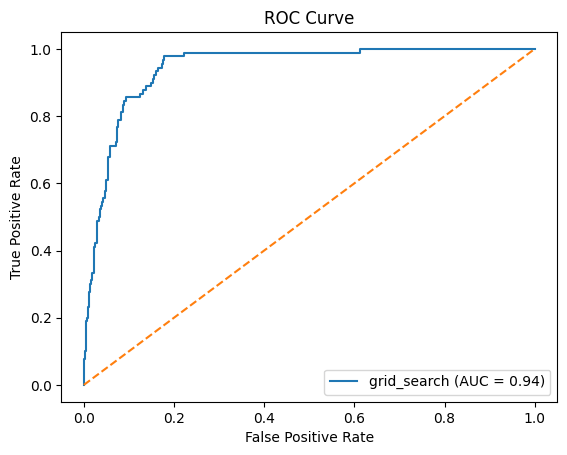

In [24]:
# Step 8: Hyperparameter Tuning for XGBoost by best score and best parameters
model4_hyperparameter_tuning = grid_search_model(X_train, y_train, X_test, y_test)

In [25]:
# Step 9: Summary the best model
save_summary(X_test, y_test)

2025-06-24 00:28:44,908 - INFO - Final model summary saved to final_model_summary.txt


# Conlusion

In [26]:
# Open and read the summary file
with open("final_model_summary.txt", "r") as file:
    summary_content = file.read()

# Display the content in the notebook
print(summary_content)

[Manual Tuning Model]
ROC AUC: 0.9438
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       734
           1       0.60      0.46      0.52        90

    accuracy                           0.91       824
   macro avg       0.77      0.71      0.73       824
weighted avg       0.90      0.91      0.90       824


[Grid SearchCV Model]
ROC AUC: 0.9432
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       734
           1       0.68      0.40      0.50        90

    accuracy                           0.91       824
   macro avg       0.80      0.69      0.73       824
weighted avg       0.90      0.91      0.90       824



# == END ==
___

In [27]:
!pip freeze

absl-py==2.3.0
anyio @ file:///home/conda/feedstock_root/build_artifacts/bld/rattler-build_anyio_1742243108/work
argon2-cffi @ file:///home/conda/feedstock_root/build_artifacts/argon2-cffi_1749017159514/work
argon2-cffi-bindings @ file:///D:/bld/argon2-cffi-bindings_1725356678807/work
arrow @ file:///home/conda/feedstock_root/build_artifacts/arrow_1733584251875/work
asttokens @ file:///home/conda/feedstock_root/build_artifacts/asttokens_1733250440834/work
astunparse==1.6.3
async-lru @ file:///home/conda/feedstock_root/build_artifacts/bld/rattler-build_async-lru_1742153708/work
attrs @ file:///home/conda/feedstock_root/build_artifacts/attrs_1741918516150/work
babel @ file:///home/conda/feedstock_root/build_artifacts/babel_1738490167835/work
beautifulsoup4==4.13.4
bleach @ file:///home/conda/feedstock_root/build_artifacts/bld/rattler-build_bleach_1737382993/work
bs4==0.0.2
cached-property @ file:///home/conda/feedstock_root/build_artifacts/cached_property_1615209429212/work
certifi @ fil

In [28]:
!pip freeze > requirements.txt